# Derive Initial Velocity from Total Energy

In [1]:
%matplotlib widget
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

## 0. Parameters

In [3]:
# Mass:
m1, m2 = 0.5, 0.5
mass_sum = m1 + m2
black_hole_mass = [m1, m2]

# Radius:
radius = 2
r1, r2 = radius*0.5, radius*0.5

# Eccentricity:
e = 0.0

# Time range:
t0, tf = 0, 40
tl = tf*10

# 3D Rotation:
angles = [np.pi/6, np.pi/4, np.pi/6]  # omega, I, Omega

In [4]:
# Galaxical Potential:
def potential(constant_c, comp_vector, r):
    c_term = (constant_c*comp_vector) / r
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = c_term*(first_term - second_term)
    return V

## 1. Setting $c$

In [5]:
c = (2/np.pi)*(100*m1)

## 2. Setting $E_{total}$

$E_{i} = \frac{1}{2}(u_{i}^{2} + v_{i}^{2} + w_{i}^{2}) - \frac{m_{j}^{3}}{r_{i}(m_{1} + m_{2})^{2}} - c\frac{\arctan{(r_{i})}}{r_{i}}, i\neq j.$   $ i, j \in \{ 1, 2 \}$  

$E_{total}=E_{1} + E_{2}$  

$E_{total} = 2E_{i}$  

$V_{0}^2 = 2E_{i} + I \geq 0$, $I = \frac{m_{j}^{3}}{r_{i}(m_{1} + m_{2})^{2}} + c\frac{\arctan{(r_{i})}}{r_{i}}$

$E_{i} \geq -\frac{I}{2}$

In [6]:
I = (0.5**3) + c*(np.arctan(radius*0.5)/(radius*0.5)) 

# A:
A = 2

# E total:
egy_total = -I/A


## 3. $E_{i}/A$ Control Term $K$

$\frac{E_{total}}{A}\cdot K$

### 3-1.

In [7]:
# K:
K = 1

# E1, E2:
egy_1 = egy_total*0.5
egy_2 = egy_total*0.5

E_contro_p1 = egy_1 * K
E_contro_p2 = egy_2 * K


In [8]:
case_c = SMBBH_NU(black_hole_mass,
                  t0=t0,
                  tf=tf,
                  tl=tl, 
                  constant_c=c,
                  radius=radius,
                  eccentricity=e,
                  angles=angles,
                  potential_function=potential)

In [9]:
# Show original initial velocity:
vo1_0 = case_c.v1_0
vo2_0 = case_c.v2_0

In [10]:
print(f"P1 original velocity : {vo1_0}")
print(f"P2 original velocity : {vo2_0}")

P1 original velocity : [0.  0.5 0. ]
P2 original velocity : [ 0.  -0.5  0. ]


In [11]:
# p1_v0 = vo1_0 + E_contro_p1 
# p2_v0 = vo2_0 + E_contro_p2

p1_v0 = np.array([0.0, vo1_0[1] + E_contro_p1, 0.0]) 
p2_v0 = np.array([0.0, vo2_0[1] - E_contro_p2, 0.0]) 

In [12]:
print(f"P1 initial velocity : {p1_v0}")
print(f"P2 initial velocity : {p2_v0}")

P1 initial velocity : [ 0.      -5.78125  0.     ]
P2 initial velocity : [0.      5.78125 0.     ]


In [13]:
# Set new initial velocity:

# case_c.initial_value = np.hstack((case_c.r1_0, case_c.r2_0, 
#                                   p1_v0 , p2_v0))

#### Run Test

In [14]:
# run
case_c_dict = case_c.run()
for key in case_c_dict.keys():
    print(key)

no_rot_data
rot_data
no_rot_energy
no_rot_energy0
rot_energy
rot_energy0


In [15]:
rot_mod = "rotation"
plot_c = Plot_Result(case_c_dict, radius, t0, tf, tl=tl)

#### Plot 3D

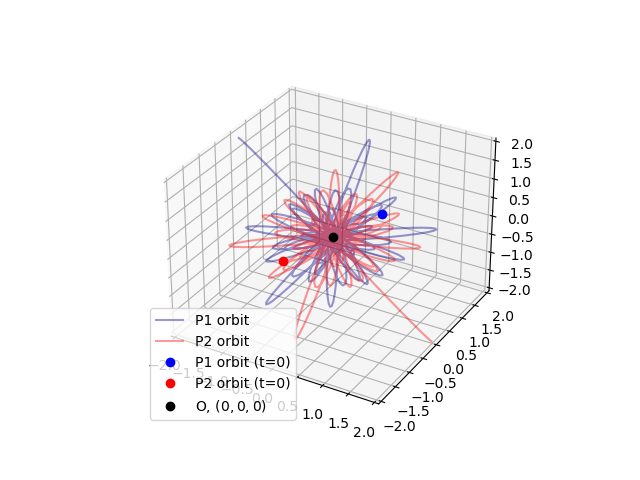

In [16]:
plt.style.use("default")
plot_c.plot_rk4_result(mode=rot_mod)

#### Plot 2D Plane

##### x-y

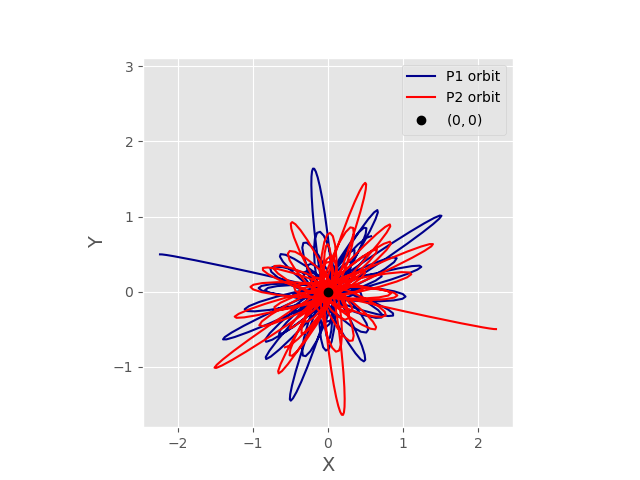

In [17]:
plot_c.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-y")

##### x-z

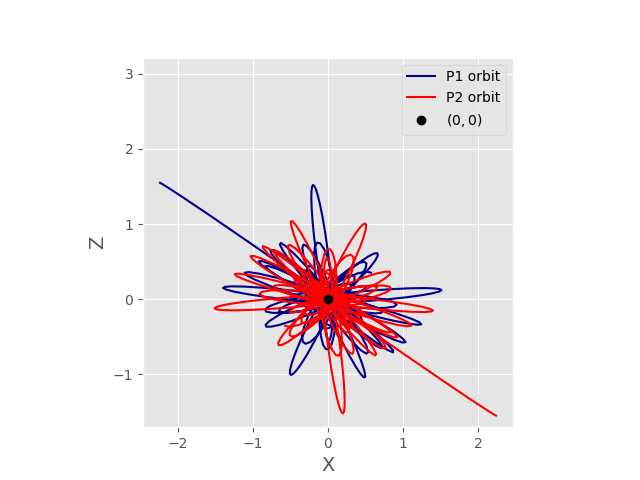

In [18]:
plot_c.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-z")

##### y-z

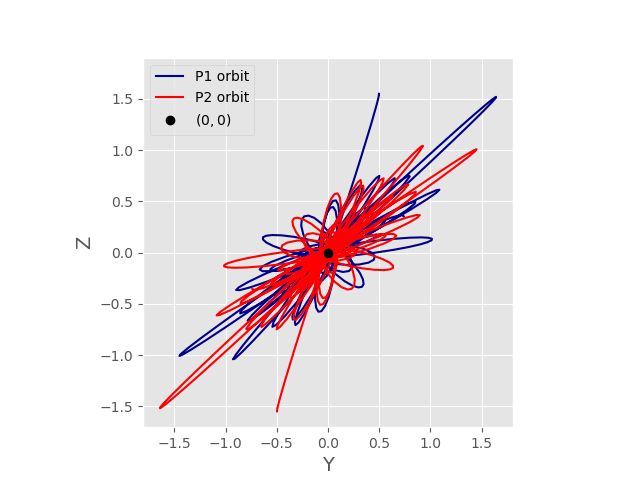

In [19]:
plot_c.plot_2D_plane_orbit(mode=rot_mod, plane_choose="y-z")

#### Plot Time-Orbit

##### t-x

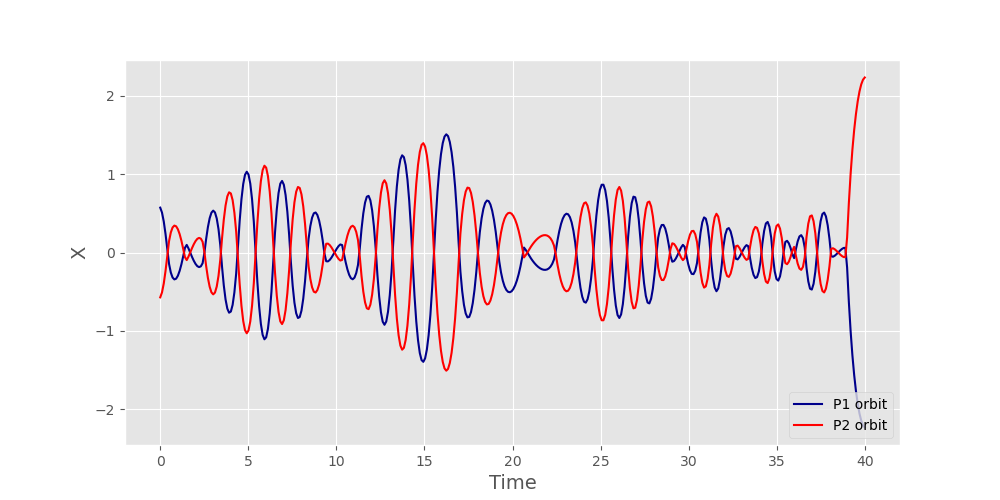

In [20]:
plot_c.plot_2D_time_orbit(mode=rot_mod, plane_choose="x")

##### t-y

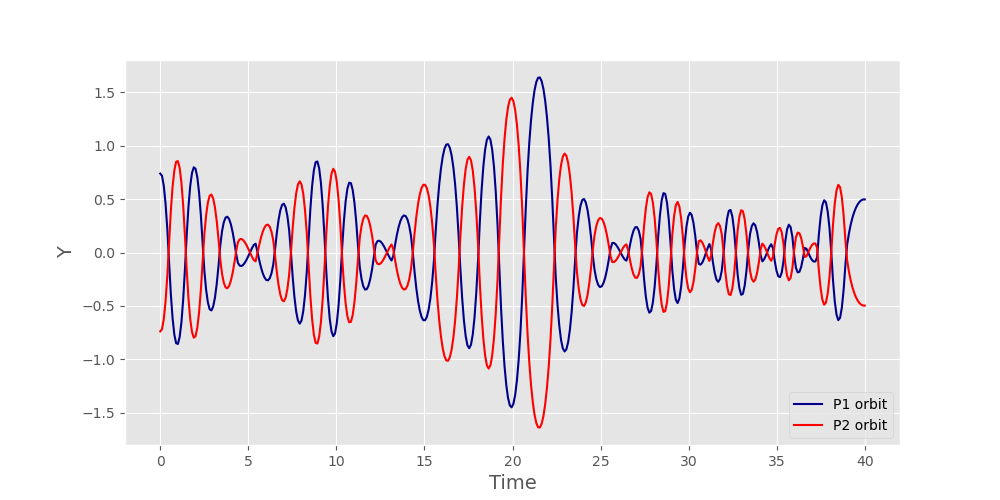

In [21]:
plot_c.plot_2D_time_orbit(mode=rot_mod, plane_choose="y")

##### t-z

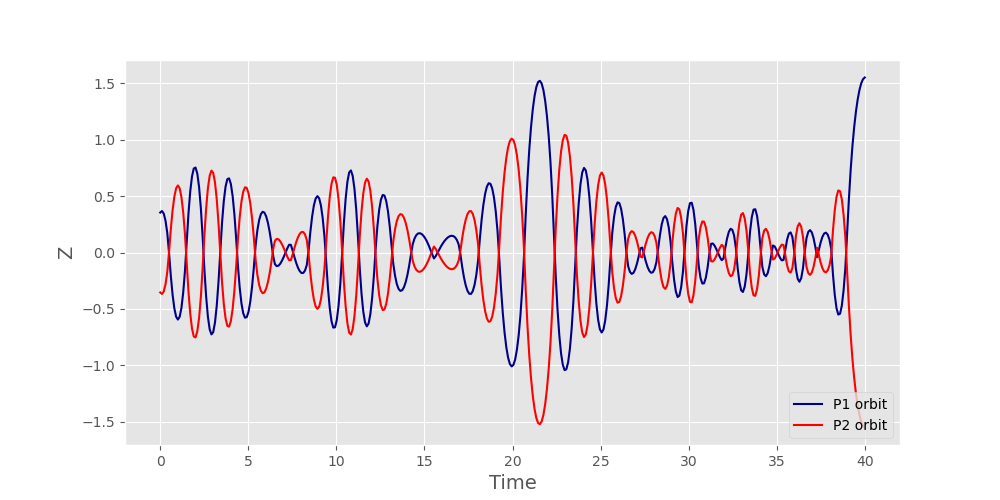

In [22]:
plot_c.plot_2D_time_orbit(mode=rot_mod, plane_choose="z")

#### Plot Total Energy

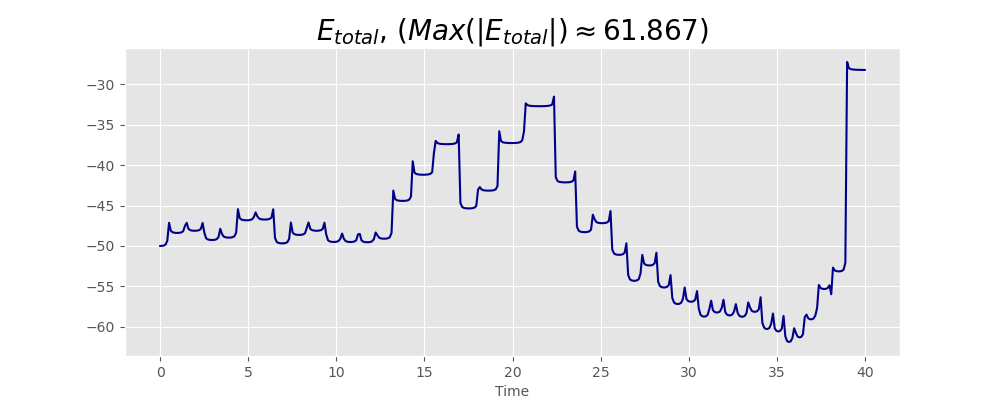

In [23]:
plot_c.plot_total_energy(mode=rot_mod)

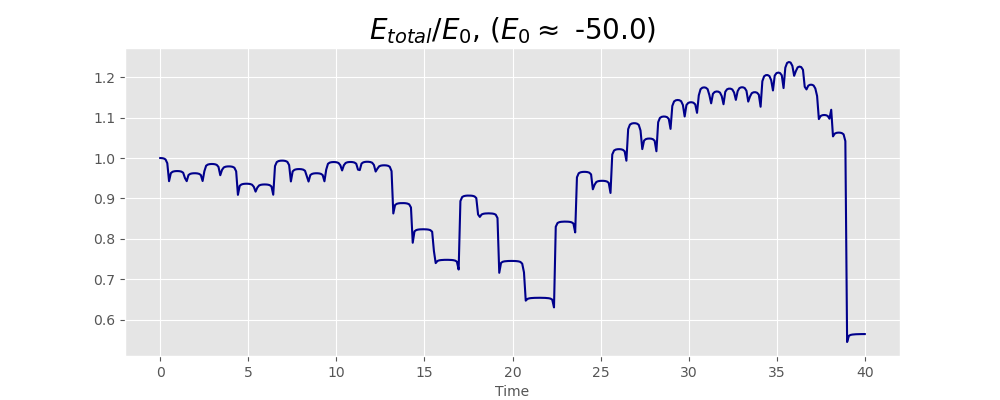

In [24]:
plot_c.plot_total_energy_divid_initE(mode=rot_mod)